**CROP YIELD ESTIMATION USING REGRESSION**
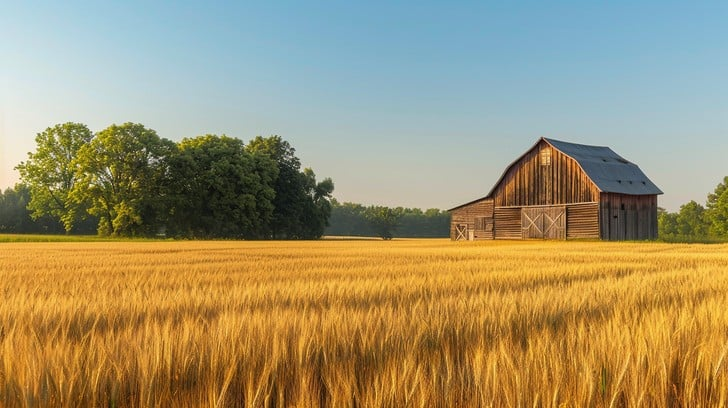

**About Dataset:**This dataset contains agricultural data for 1,000,000 samples aimed at predicting crop yield (in tons per hectare) based on various factors. The dataset can be used for regression tasks in machine learning, especially for predicting crop productivity.

**1.** IMPORTING NECESSARY MODULES

In [ ]:
import pandas as pd
import numpy as no
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import math
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**2.**LOADING DATA, ANALYSING DATA(EDA) & PREPROCESSING DATA

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets-2024july/Projects/crop_yield.csv')
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [ ]:
df.isna().sum()

,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,0
Fertilizer_Used,0
Irrigation_Used,0
Weather_Condition,0
Days_to_Harvest,0
Yield_tons_per_hectare,0


In [ ]:
df.dtypes

,0
Region,object
Soil_Type,object
Crop,object
Rainfall_mm,float64
Temperature_Celsius,float64
Fertilizer_Used,bool
Irrigation_Used,bool
Weather_Condition,object
Days_to_Harvest,int64
Yield_tons_per_hectare,float64


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,0
Fertilizer_Used,0
Irrigation_Used,0
Weather_Condition,0
Days_to_Harvest,0
Yield_tons_per_hectare,0


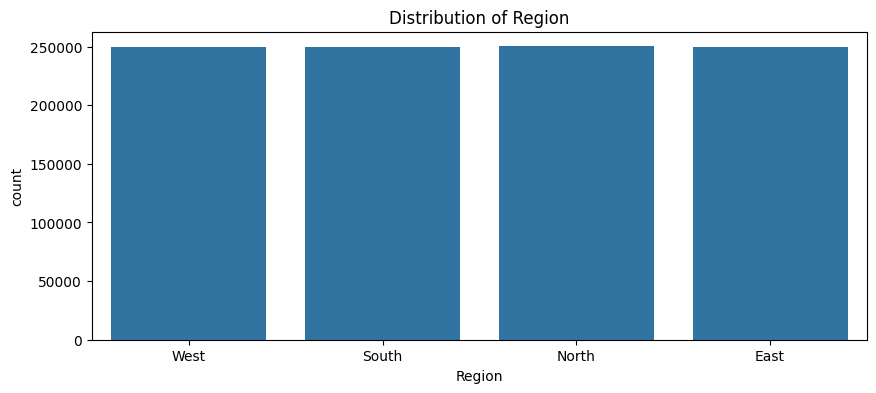

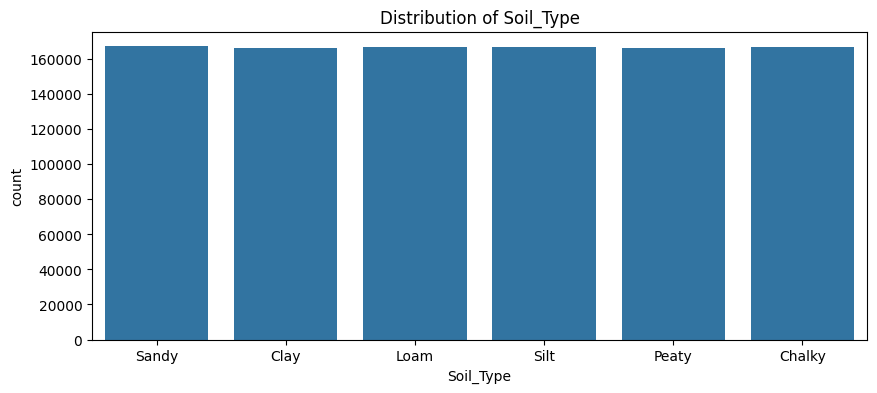

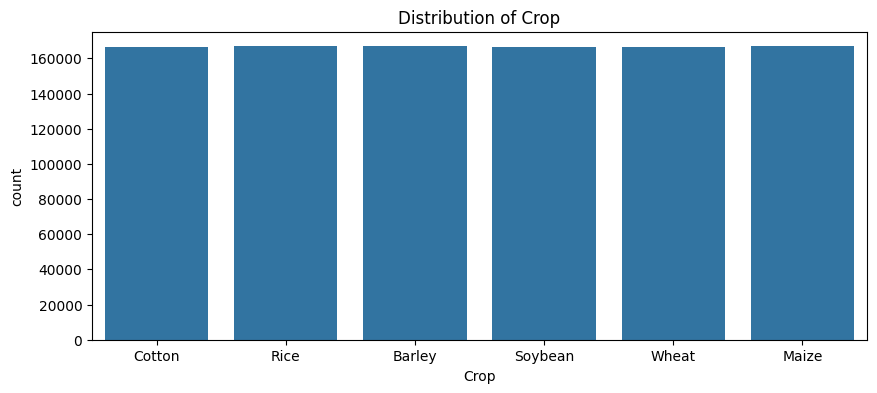

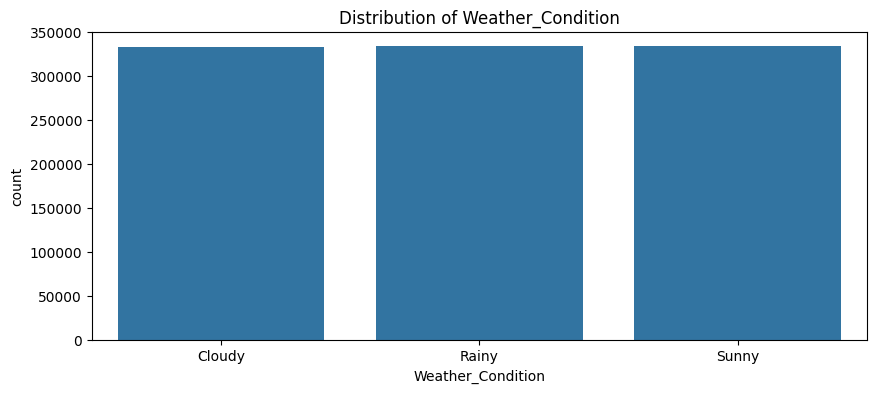

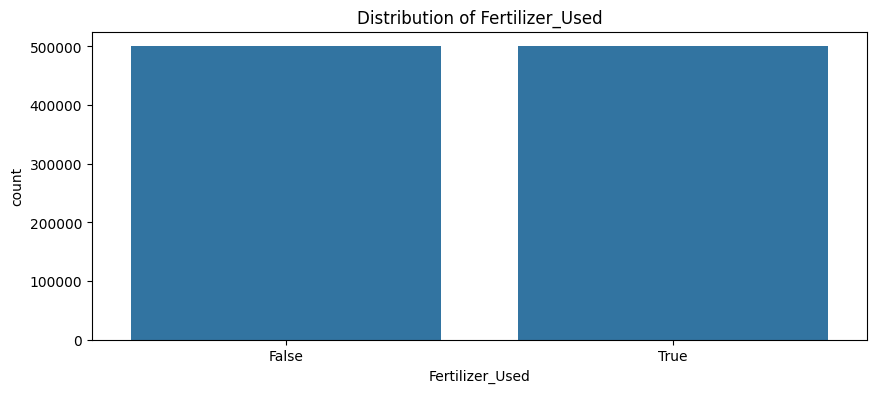

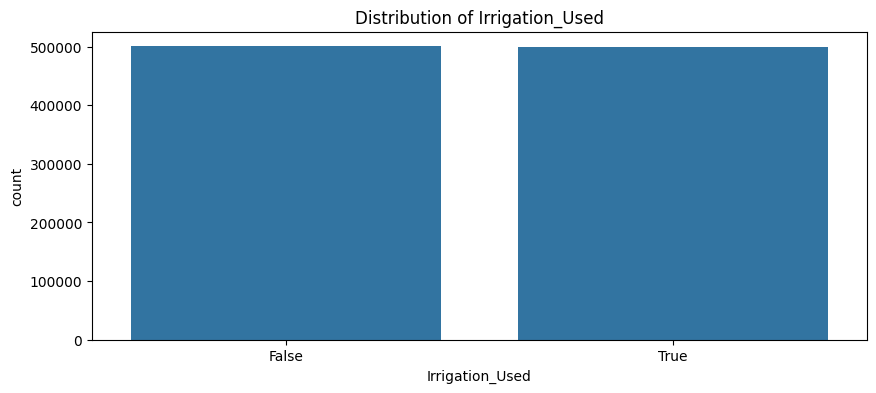

In [ ]:
cat_cols = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition','Fertilizer_Used','Irrigation_Used']
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

*Inference: It is clear from this plot that distribution of values of all non-numeric columns are even*

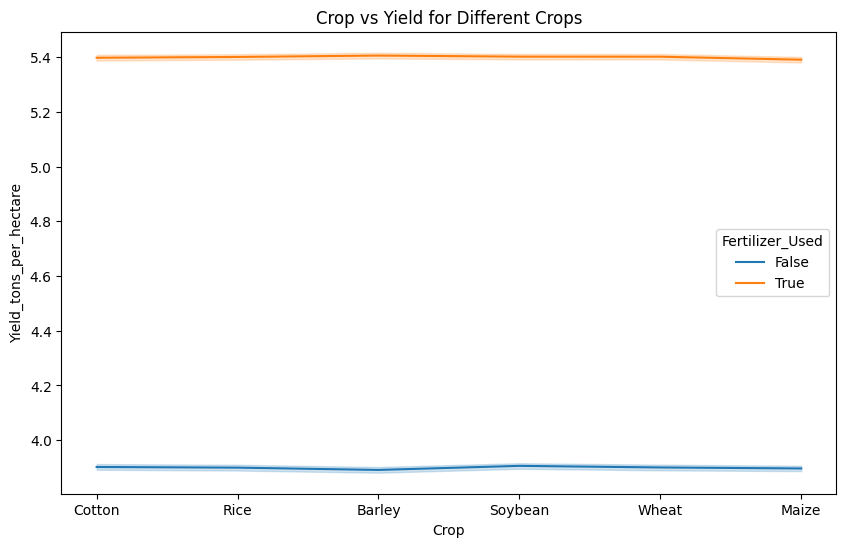

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Crop', y='Yield_tons_per_hectare', hue='Fertilizer_Used')
plt.title(f'Crop vs Yield for Different Crops')
plt.show()

*Inference: It is obvious from the plot that there is increase in yield of about one and half ton per hecatre while using fertilizers and not using it*

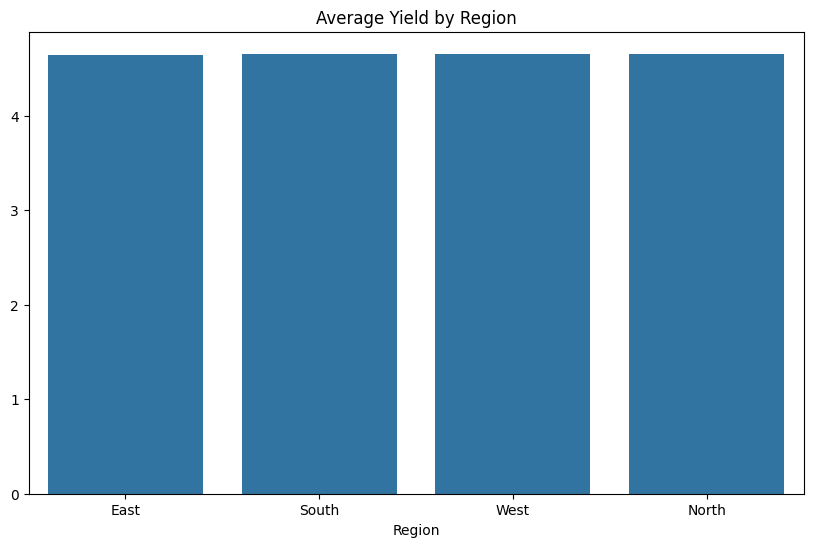

In [ ]:
region_yield = df.groupby('Region')['Yield_tons_per_hectare'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_yield.index, y=region_yield.values)
plt.title('Average Yield by Region')
plt.show()

*Inference: Yield from all regions are almost equal*

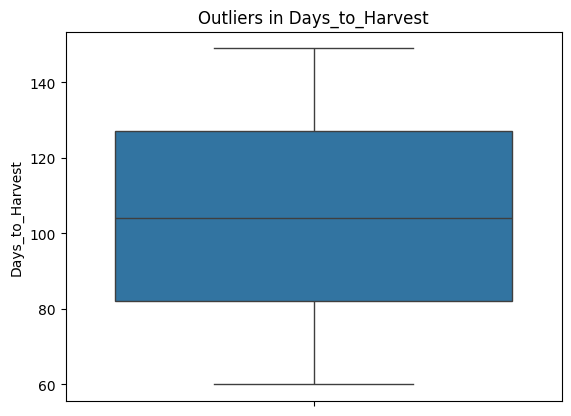

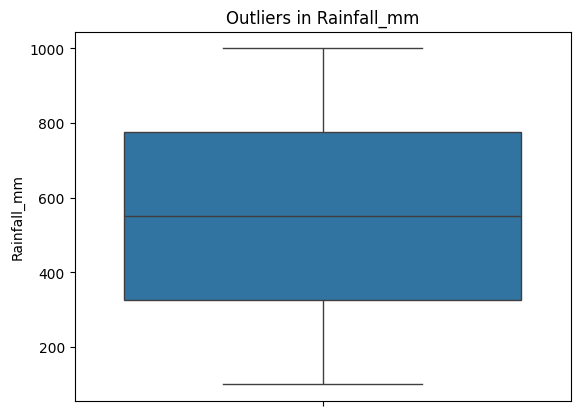

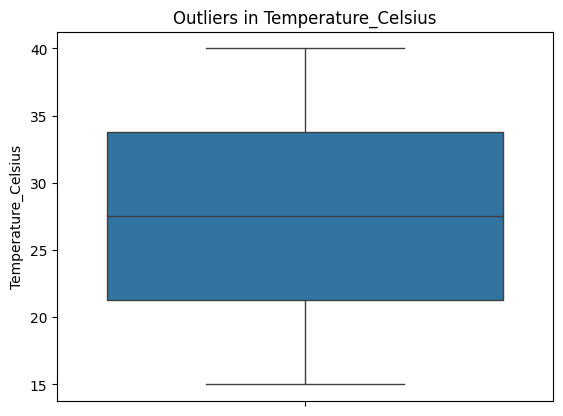

In [ ]:
num_cols=['Days_to_Harvest','Rainfall_mm','Temperature_Celsius']
for col in num_cols:
    sns.boxplot(data=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()

*Inference: No outliers are found in the numeric columns of the dataset*

In [ ]:
encoder=LabelEncoder()
objects=['Region','Soil_Type','Crop','Fertilizer_Used','Irrigation_Used','Weather_Condition']
for column in objects:
  df[column]=encoder.fit_transform(df[column])
df.dtypes

,0
Region,int64
Soil_Type,int64
Crop,int64
Rainfall_mm,float64
Temperature_Celsius,float64
Fertilizer_Used,int64
Irrigation_Used,int64
Weather_Condition,int64
Days_to_Harvest,int64
Yield_tons_per_hectare,float64


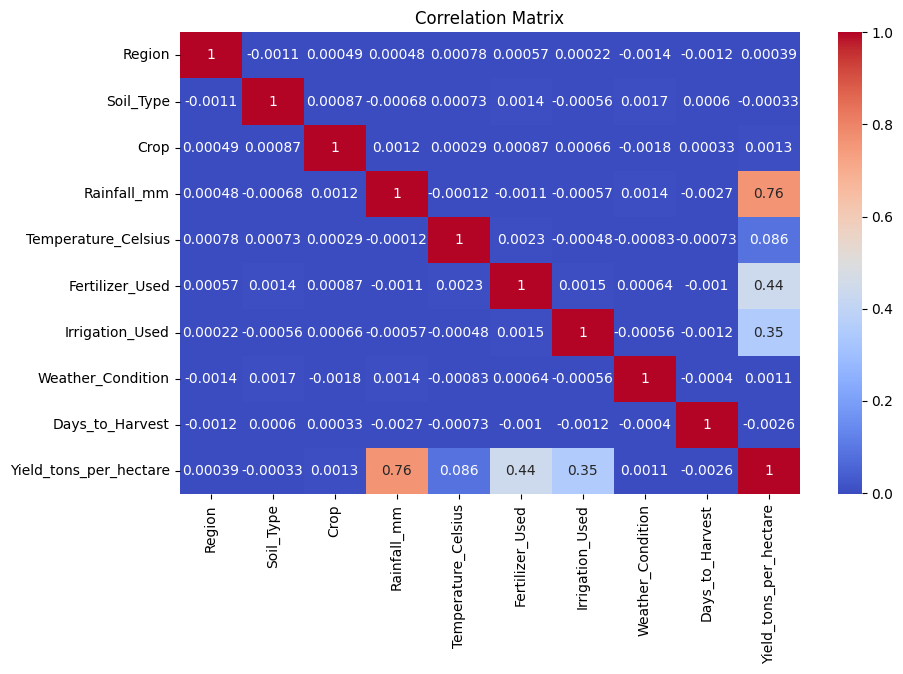

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

*Inference: Factors which highly influence yield are: Rainfall, Temperature, Fertilizer and Irrigation*

**3.**BUILDING MODELS AFTER SEPERATING INPUT & OUTPUT ALONG WITH SPLITTING FOR TRAINING & TESTING

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(X)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=2,test_size=0.3)
x_test.shape,y_test.shape,x_train.shape,y_train.shape

((300000, 9), (300000,), (700000, 9), (700000,))

In [ ]:
lr=LinearRegression()
knr=KNeighborsRegressor()
dtr=DecisionTreeRegressor()
adr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
xgr=XGBRegressor()
models=[lr,knr,dtr,adr,gbr,xgr]
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('---------',model,'----------')
  print('R2-score:',r2_score(y_test,y_pred))
  print('MAE:',mean_absolute_error(y_test,y_pred))
  print('MSE:',mean_squared_error(y_test,y_pred))
  print('RMSE:',math.sqrt(mean_squared_error(y_test,y_pred)))

--------- LinearRegression() ----------
R2-score: 0.9131883588297882
MAE: 0.3993509078525756
MSE: 0.25033507271840655
RMSE: 0.5003349605198567
--------- KNeighborsRegressor() ----------
R2-score: 0.8864165586670527
MAE: 0.4567495678131999
MSE: 0.3275357850906166
RMSE: 0.5723074218377887
--------- DecisionTreeRegressor() ----------
R2-score: 0.8150171640294005
MAE: 0.5837351313033021
MSE: 0.5334272117210812
RMSE: 0.7303610146503449
--------- AdaBoostRegressor() ----------
R2-score: 0.8869413240134788
MAE: 0.4564252416679198
MSE: 0.32602254136676967
RMSE: 0.5709838363445761
--------- GradientBoostingRegressor() ----------
R2-score: 0.912659170106919
MAE: 0.4005292895184978
MSE: 0.2518610719465687
RMSE: 0.5018576211900828
--------- XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature

**4.** FEATURE SELECTION USING CORRELATION

In [ ]:
df.drop(['Days_to_Harvest','Weather_Condition','Crop','Region','Soil_Type'],inplace=True,axis=1)
df.columns

Index(['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used',
       'Irrigation_Used', 'Yield_tons_per_hectare'],
      dtype='object')

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
x_scaled=scaler.fit_transform(X)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=2,test_size=0.3)
x_test.shape,y_test.shape,x_train.shape,y_train.shape

((300000, 4), (300000,), (700000, 4), (700000,))

In [ ]:
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('---------',model,'----------')
  print('R2-score:',r2_score(y_test,y_pred))
  print('MAE:',mean_absolute_error(y_test,y_pred))
  print('MSE:',mean_squared_error(y_test,y_pred))
  print('RMSE:',math.sqrt(mean_squared_error(y_test,y_pred)))

--------- LinearRegression() ----------
R2-score: 0.9131890309738003
MAE: 0.3993492392343633
MSE: 0.2503331344850326
RMSE: 0.5003330235803275
--------- KNeighborsRegressor() ----------
R2-score: 0.8958623755363592
MAE: 0.437545822127011
MSE: 0.3002972808878649
RMSE: 0.547993869388942
--------- DecisionTreeRegressor() ----------
R2-score: 0.8222817423031867
MAE: 0.5719161527849946
MSE: 0.5124786533719637
RMSE: 0.7158761438768327
--------- AdaBoostRegressor() ----------
R2-score: 0.8856497508537068
MAE: 0.45904977616903675
MSE: 0.3297469964803266
RMSE: 0.5742360111315962
--------- GradientBoostingRegressor() ----------
R2-score: 0.9126609544503204
MAE: 0.40052523762258363
MSE: 0.25185592651066724
RMSE: 0.5018524947737804
--------- XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature

*After feature selection performance of models of some algorithm made better performance while some remained same.*

With lesser number of features better predictions are made. Among this LinearRegression() model has best performance. So the solution model is 'lnr'

In [ ]:
import pickle
pickle.dump(lr,open('model.sav','wb'))
pickle.dump(scaler,open('scaler.sav','wb'))